In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("covid_19_india.csv",parse_dates=["Date"],dayfirst=True)
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df=df[["Date","State/UnionTerritory","Cured","Deaths","Confirmed"]]
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [4]:
df.columns=["date","state","cured","deaths","confirmed"]
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [5]:
mp=df[df["state"]=="Madhya Pradesh"]
mp.head()

,date,state,cured,deaths,confirmed
256,2020-03-21,Madhya Pradesh,0,0,4
279,2020-03-22,Madhya Pradesh,0,0,4
302,2020-03-23,Madhya Pradesh,0,0,6
325,2020-03-24,Madhya Pradesh,0,0,7
349,2020-03-25,Madhya Pradesh,0,0,14


In [6]:
import datetime as dt

In [7]:
mp["date"]=mp["date"].map(dt.datetime.toordinal)
mp.head()

<ipython-input-7-8d84ac05e167>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp["date"]=mp["date"].map(dt.datetime.toordinal)


,date,state,cured,deaths,confirmed
256,737505,Madhya Pradesh,0,0,4
279,737506,Madhya Pradesh,0,0,4
302,737507,Madhya Pradesh,0,0,6
325,737508,Madhya Pradesh,0,0,7
349,737509,Madhya Pradesh,0,0,14


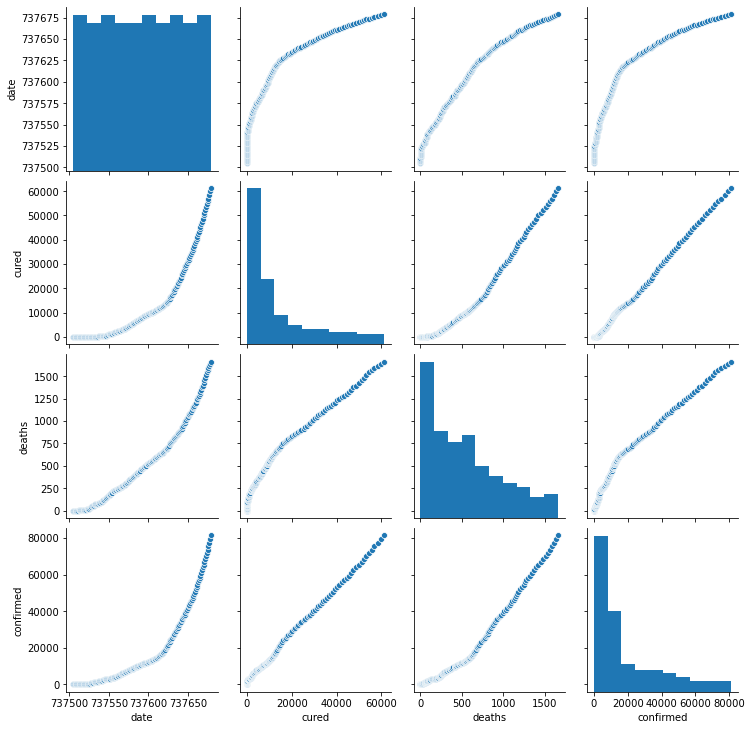

In [8]:
sns.pairplot(mp[["date","state","cured","deaths","confirmed"]])

# Now,Transform the data

In [9]:
mp["transconf"]=np.log(mp["confirmed"])
mp.head()

<ipython-input-9-8647adc385b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp["transconf"]=np.log(mp["confirmed"])


,date,state,cured,deaths,confirmed,transconf
256,737505,Madhya Pradesh,0,0,4,1.386294
279,737506,Madhya Pradesh,0,0,4,1.386294
302,737507,Madhya Pradesh,0,0,6,1.791759
325,737508,Madhya Pradesh,0,0,7,1.945910
349,737509,Madhya Pradesh,0,0,14,2.639057


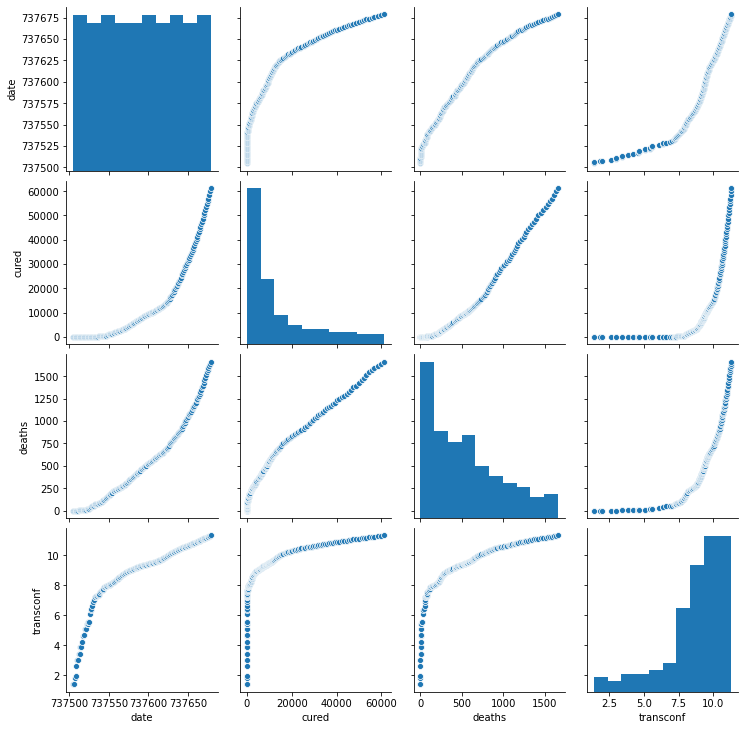

In [10]:
sns.pairplot(mp[["date","state","cured","deaths","transconf"]])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
x=mp[["date"]]
y=mp[["transconf"]]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)


In [13]:
model1=LinearRegression()

In [14]:
model1.fit(xtrain,ytrain)

LinearRegression()

In [15]:
Accuracy1=model1.score(xtrain,ytrain)
Accuracy1

0.8065171439416279

In [16]:
ypred1=model1.predict(xtest)

In [17]:
ypred1

array([[ 9.52695707],
       [ 7.97691628],
       [10.92199378],
       [ 6.27187141],
       [ 8.51943055],
       [ 9.56570809],
       [ 7.8219122 ],
       [10.26322644],
       [ 9.21694891],
       [ 6.46562651],
       [ 9.33320197],
       [ 5.72935714],
       [ 7.66690812],
       [11.19325091],
       [11.46450805],
       [ 7.434402  ],
       [ 7.55065506],
       [ 7.89941424],
       [ 8.90694075],
       [ 7.35689996],
       [ 6.31062243],
       [ 7.39565098],
       [ 9.95321828],
       [ 6.07811631],
       [10.1857244 ],
       [ 5.8456102 ],
       [ 8.75193667],
       [ 5.38059796],
       [11.73576519],
       [ 5.92311223],
       [11.23200193],
       [ 9.60445911],
       [11.34825499],
       [ 8.4031775 ],
       [10.22447542]])

In [18]:
ytest

,transconf
3837,9.634562
2396,8.890273
5109,10.614818
943,6.593045
2901,9.215228
3873,9.656755
2254,8.759512
4514,10.200848
3549,9.486911
1108,7.249215


In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [20]:
Er1=mean_squared_error(ypred1,ytest)
Er1


0.936496037359765

In [21]:
mae1=mean_absolute_error(ypred1,ytest)
mae1

0.6757990462538018

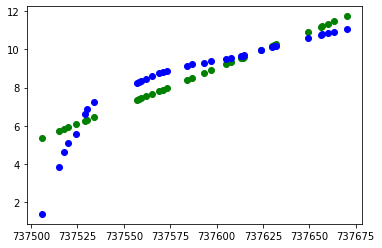

In [22]:
plt.scatter(xtest,ypred1,color="g")
plt.scatter(xtest,ytest,color="b")

In [23]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor(criterion="mae",splitter="random")

In [24]:
model2.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mae', splitter='random')

In [25]:
Accuracy2=model2.score(xtrain,ytrain)
Accuracy2

1.0

In [26]:
ypred2=model2.predict(xtest)
ypred2

array([ 9.70143257,  8.85708814, 10.6359516 ,  6.4035742 ,  9.19512521,
        9.70143257,  8.80462523, 10.2327913 ,  9.4700087 ,  7.30317005,
        9.51731023,  3.8501476 ,  8.56331313, 10.74473141, 10.94841773,
        8.39525152,  8.51258258,  8.85708814,  9.35720745,  8.19257047,
        6.4035742 ,  8.19257047,  9.98796656,  5.55682806, 10.12029105,
        4.6443909 ,  9.32758993,  1.79175947, 11.06609134,  5.10594547,
       10.74473141,  9.70143257, 10.83249706,  9.12999762, 10.12029105])

In [27]:
Er2=mean_squared_error(ypred2,ytest)
Er2

0.013852524649844104

In [28]:
mae2=mean_absolute_error(ypred2,ytest)
mae2

0.05860507342717702

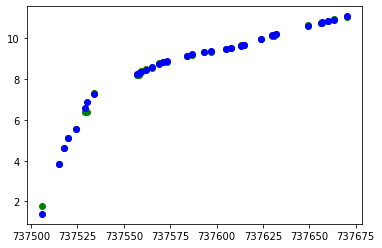

In [29]:
plt.scatter(xtest,ypred2,color="g")
plt.scatter(xtest,ytest,color="b")

In [30]:
from sklearn.svm import SVR
model3=SVR(C=100)

In [31]:
model3.fit(xtest,ytest)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=100)

In [32]:
Accuracy3=model3.score(xtrain,ytrain)
Accuracy3

0.9958523812221394

In [33]:
ypred3=model3.predict(xtest)
ypred3

array([ 9.66301653,  8.80199265, 10.68153716,  6.65289061,  9.26239324,
        9.67736424,  8.66559907, 10.10877714,  9.56834136,  7.27576615,
        9.6011544 ,  3.82083242,  8.54141466, 10.8656332 , 10.97580142,
        8.38466171,  8.45871289,  8.73266856,  9.46969243,  8.33894687,
        6.79435313,  8.36152901,  9.87548204,  5.81592095, 10.04519941,
        4.54471811,  9.40129379,  1.48644233, 10.98966246,  4.9975717 ,
       10.88648995,  9.69256357, 10.93922546,  9.17621788, 10.07662401])

In [34]:
Er3=mean_squared_error(ypred3,ytest)
Er3

0.007813364654126027

In [35]:
mae3=mean_absolute_error(ypred3,ytest)
mae3

0.07713351684604951

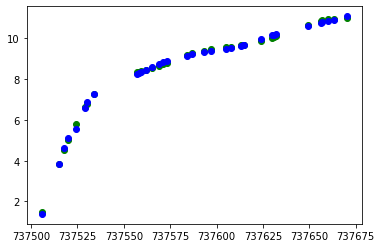

In [36]:
plt.scatter(xtest,ypred3,color="g")
plt.scatter(xtest,ytest,color="b")

In [37]:
print(Accuracy1)
print(Accuracy2)
print(Accuracy3)

0.8065171439416279
1.0
0.9958523812221394


In [38]:
print(Er1)
print(Er2)
print(Er3)

0.936496037359765
0.013852524649844104
0.007813364654126027


In [39]:
print(mae1)

0.6757990462538018


In [40]:
Res=pd.DataFrame({"Model":["Linear Regression","Decision Tree","SVR"],"Accuracy":[Accuracy1,Accuracy2,Accuracy3],"MSE":[Er1,Er2,Er3],"MAE":[mae1,mae2,mae3]},index=[1,2,3])
Res

,Model,Accuracy,MSE,MAE
1,Linear Regression,0.806517,0.936496,0.675799
2,Decision Tree,1.000000,0.013853,0.058605
3,SVR,0.995852,0.007813,0.077134


In [41]:
Res.to_csv("Results for Regression Models(Madhya Pradesh).csv",index=False)

In [42]:
Res1=pd.read_csv("Results for Regression Models(Madhya Pradesh).csv")
Res1

,Model,Accuracy,MSE,MAE
0,Linear Regression,0.806517,0.936496,0.675799
1,Decision Tree,1.000000,0.013853,0.058605
2,SVR,0.995852,0.007813,0.077134
